In [3]:
from IPython.display import HTML,display
display(HTML("<style> .container {width:100%} !important </style>"))

# Part I - Exploratory data analysis of FordGoBike SF Bay area trip data.
## by Gilbert Adikankwu

## Introduction
>Ford GoBike is the Bay Area's bikeshare system, which aims to be fast, convenient way to get around whether you're commuting, running errands, or just sightseeing.
In this analysis, I aim to perform Univariate, Bivariate and Multivariate exploration with this data that includes trip duration information about individual rides made by users of the Ford GoBike bike-sharing system covering the greater San Francisco Bay area in February 2019.


## Preliminary Wrangling


In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
# Load bike share dataset
bike_share = pd.read_csv('201902-fordgobike-tripdata-Copy1.csv')
bike_share.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


`bike_share` columns description from Left to Right:

- duration_sec : duration of trip in seconds 
- start_time : Start date of trip with date and time, in PST
- end_time : End date of trip with date and time, in PST
- start_station_id: Numeric reference for the start station.
- start_station_name: Station name of start station
- start_station_latitude: Latitude of start station
- start_station_longitude: Longitude of start station
- end_station_id: Numeric reference for end station
- end_station_name: Station name for end station
- end_station_latitude: Latitude of end station
- end_station_longitude: Longitude of end station
- bike_id: ID of bike used
- user_type: Type of user subscription (Subscriber or Customer)
- bike_share_for_all_trip: An indication of how the user used the bike share service for the completion of their trip




In [7]:
# print the structure of the dataset
print(bike_share.shape)

# print the datatypes of the variables in the dataset
print(bike_share.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [8]:
# Check duplicates 
bike_share.duplicated().sum()

0

In [9]:
# Get statistical summary of dataset
bike_share.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data Cleaning

### Issues

1. Missing values in start_station_id, start_station_name, end_station_id, end_station_name.

1.  Missing values in  member_gender column 

1.  Missing values and inaccurate data(unrealistic birth years) in member_birth_year column. The minimum birth year is 1878. That seems unrealistic because a person born in 1878 will be 141 years old in 2019 but as at then, the guinness world record of the [oldest person alive in the world was 116 years old](https://www.guinnessworldrecords.com/news/2019/3/worlds-oldest-person-confirmed-as-116-year-old-kane-tanaka-from-japan)

1.  Invalid datatypes (start_time and end_time should be datetime not object, member_birth_year should be int64 not float64, start_station_id and end_station_id should be object not float64)

1. Multiple variables in the start_time and end_time columns
1. Observation forms a column (start_station and end_station _latitude_ and _longitude_ respectively should be in single columns as start_station_co-ordinates and end_station_co-oridnates)

In [10]:
# Make a copy of the dataset
bshare_clean = bike_share.copy()

### Define

- Use pandas `dropna` method to delete rows with missing values in all `_station_` related columns

### Code

In [11]:
# delete rows with non-null values in all station related columns
bshare_clean.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)

### Test

In [12]:
bshare_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

### Define

- Use pandas `replace` method to the missing values in  member_gender column with 'Other'

### Code

In [13]:
# Replace nan values in member gender column with 'unknown'
bshare_clean['member_gender'].replace(to_replace = np.nan, value = 'Other', inplace=True)

### Code

In [14]:
# Check for null values in member_gender column 
bshare_clean['member_gender'].isna().sum()

0

### Define

Replace the missing values and unrealistic birth year in the `member_birth_year` column with the mean of all the birth years since 75% of all the user type were born on or before 1992 and __according to google no person above 100 years old can effectively ride a two wheeler bicycle.__

- Compute the `mean` of all the member birth years 


- Use pandas `replace` method to the missing values with the computed `mean`


### Code

In [15]:
# Get the average birth year 
average_birth_year = bshare_clean['member_birth_year'].mean().round()

# replace nan values in member_birth_year column with nan values
bshare_clean['member_birth_year'].replace(to_replace=np.nan, value=average_birth_year, inplace=True)

In [16]:
# replace values of unrealistic birth years (member birth < 1919)
bshare_clean.loc[bshare_clean['member_birth_year']<1919, 'member_birth_year'] = average_birth_year

### Test

In [17]:
# get summary statistics of member birth year column 
bshare_clean['member_birth_year'].describe()

count    183215.000000
mean       1984.845329
std           9.744544
min        1920.000000
25%        1981.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Define

- Use `pd.to_datetime()` to convert `start_time` and `end_time` values to `datetime` datatype.


- Use `astype()` to convert `member_birth_year` to `int64`


- Use `astype()` to convert `start_station_id` , `end_station_id`, `bike_id` to `str`

### Code

In [18]:
# Convert start time and end time to 'datetime' datatype
bshare_clean['start_time'] = pd.to_datetime(bshare_clean['start_time'])
bshare_clean['end_time'] = pd.to_datetime(bshare_clean['end_time'])

# Convert member_birth year to `int64`datatype
bshare_clean['member_birth_year'] = bshare_clean['member_birth_year'].astype('int64')

# Convert `start_station_id` , `end_station_id`, `bike_id` to `str` datatype
bshare_clean['start_station_id'] = bshare_clean['start_station_id'].astype('str')
bshare_clean['end_station_id'] = bshare_clean['end_station_id'].astype('str')
bshare_clean['bike_id'] = bshare_clean['bike_id'].astype('str')

### Test

In [19]:
bshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null object
user_type                  183215 non-null object
member_birth_year          183215 non-null int64
member_gender              183215 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage

### Define

- Use `dt.strftime('%B')` to extract trip month from `start_time`  column.

- Use `dt.day_name()` to extract the trip day from `start_time`  column.

- Use `dt.strftime('%H:%M')` to extract the trip clock time from `start_time`  column


### Code

In [20]:
# create trip_start_date, trip_start_month, trip_start_day and trip_start_clock time columns 
# and extract their respective values  from start_time
bshare_clean['trip_start_month'] = bshare_clean.start_time.dt.strftime('%B')
bshare_clean['trip_start_day'] = bshare_clean.start_time.dt.day_name()
bshare_clean['trip_start_clock_time'] = bshare_clean.start_time.dt.strftime('%H:%M')

### Test

In [21]:
# Get concise summary of the data
bshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null object
user_type                  183215 non-null object
member_birth_year          183215 non-null int64
member_gender              183215 non-null object
bike_share_for_all_trip    183215 non-null object
trip_start_month           183215 non-null object
trip_start_day       

In [22]:
bshare_clean.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_start_month,trip_start_day,trip_start_clock_time
93601,1263,2019-02-15 17:17:32.023,2019-02-15 17:38:35.809,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,386.0,24th St at Bartlett St,37.752105,-122.419724,5162,Customer,1987,Male,No,February,Friday,17:17
96492,2265,2019-02-15 09:49:14.370,2019-02-15 10:26:59.394,276.0,Julian St at The Alameda,37.332233,-121.912517,276.0,Julian St at The Alameda,37.332233,-121.912517,3906,Subscriber,1995,Male,Yes,February,Friday,09:49
113534,433,2019-02-12 11:51:17.111,2019-02-12 11:58:30.198,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,88.0,11th St at Bryant St,37.770030,-122.411726,11,Subscriber,1978,Male,No,February,Tuesday,11:51


As we checked the last concise summary of the data, I observed that because of the deletion of rows with null values, the index numbering is not aligned with the actual number of rows so I want to reset the index.

In [23]:
# Reset the index to align with current number of rows in the frame
bshare_clean.reset_index(inplace=True)

In [24]:
# Get concise summary of data 
bshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 20 columns):
index                      183215 non-null int64
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null object
user_type                  183215 non-null object
member_birth_year          183215 non-null int64
member_gender              183215 non-null object
bike_share_for_all_trip    183215 non-null object
trip_start_month      

__Given that there are start startion and end station co-ordinate values present in the dataset, I want to create  trip_distance column that will have values of the distance covered in meters for each trip__ 

In [25]:
# create a function to calculate trip distance in meters with the coordinate values 
def get_distance(start_lat, start_long, end_lat, end_long):
    '''
    Calculate the great circle distance between two coordiantes on
    the earth
    all parameters are equal length.
    '''
    start_lat, start_long, end_lat, end_long = map(np.radians, [start_lat, start_long, end_lat, end_long])
    
    dlat = end_lat - start_lat
    dlong = end_long - start_long
    
    a = np.sin(dlat/2.0)**2 + np.cos(start_lat) * np.cos(end_lat) * np.sin(dlong/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    earth_radius = 6372800 # Earth radius in meters
    meter = earth_radius * c 
    
    return meter

# create trip_distance column 
bshare_clean['trip_distance'] = get_distance(bshare_clean['start_station_latitude'],bshare_clean['start_station_longitude'],
                                            bshare_clean['end_station_latitude'],bshare_clean['end_station_longitude'])

In [26]:
bshare_clean.sample(5)

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_start_month,trip_start_day,trip_start_clock_time,trip_distance
153278,153464,451,2019-02-06 12:35:11.383,2019-02-06 12:42:43.294,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,242.0,Milvia St at Derby St,...,-122.269384,4544,Subscriber,1999,Male,No,February,Wednesday,12:35,1342.941243
94787,94917,475,2019-02-15 15:31:35.032,2019-02-15 15:39:30.982,102.0,Irwin St at 8th St,37.766883,-122.399579,58.0,Market St at 10th St,...,-122.417385,6143,Subscriber,1971,Male,No,February,Friday,15:31,1903.520856
3368,3370,832,2019-02-28 17:12:11.410,2019-02-28 17:26:04.207,104.0,4th St at 16th St,37.767045,-122.390833,22.0,Howard St at Beale St,...,-122.394643,4320,Subscriber,1995,Female,No,February,Thursday,17:12,2548.211286
73696,73800,611,2019-02-19 12:30:31.457,2019-02-19 12:40:42.950,19.0,Post St at Kearny St,37.788975,-122.403452,75.0,Market St at Franklin St,...,-122.421239,5859,Subscriber,1990,Male,No,February,Tuesday,12:30,2301.378765
90180,90309,404,2019-02-16 13:04:03.069,2019-02-16 13:10:47.071,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,42.0,San Francisco City Hall (Polk St at Grove St),...,-122.418230,5328,Customer,1987,Female,No,February,Saturday,13:04,1039.631240


In [27]:
bshare_clean.shape

(183215, 21)

In [28]:
bshare_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 21 columns):
index                      183215 non-null int64
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null object
user_type                  183215 non-null object
member_birth_year          183215 non-null int64
member_gender              183215 non-null object
bike_share_for_all_trip    183215 non-null object
trip_start_month      

### What is the structure of your dataset?

> There are 183215 trips in the dataset with 21 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id,
end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, trip_start_day, trip_start_clock_time, and trip_distance. The datatypes of the variable are listed below:
- datetime64 - 2 variables
- float64 - 5 variables
- int64 - 3 variables
- Object - 11 variables

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out what features are best for predicitng trip duration variable.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that member age will have the strongest effect on each trip duration: the older the member the longer the trip duration. I also think that user type, trip distance, bike_share_for all trips, trip_start_day_period, trip_start_month, trip_start_day,  and gender will have effects on the duration, though to a much smaller degree than the main effect of age

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration_sec

In [29]:
# Create a dataframe copy 
gobike = bshare_clean.copy()

### How long does most trips last?

In [30]:
# Generate statiscal discription of duration_sec values in dataframe
gobike['duration_sec'].describe()

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [31]:
# Create custom helper function to write axis and title for any plot
def plot_element(xlabel,ylabel,title):
    '''
    helper function that writes axis labels 
    and plot title 
    '''
    plt.xlabel(xlabel, fontsize=15) # write x-axis label  
    plt.ylabel(ylabel, fontsize=15) # write y-axis label 
    plt.title(title, fontsize=20) # write plot title

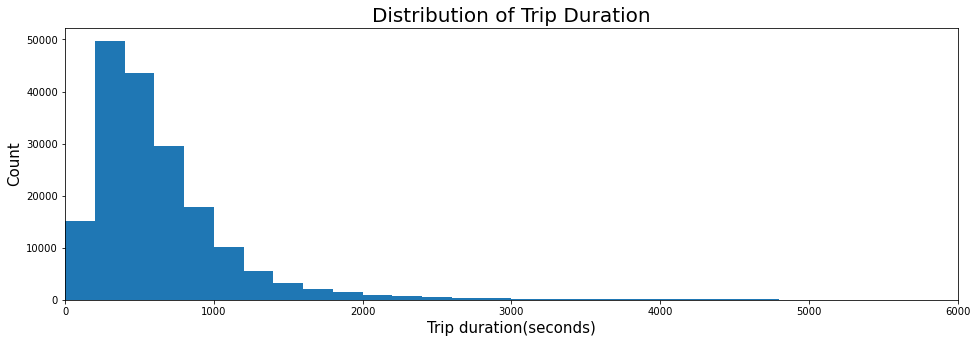

In [77]:
# plot distribution histogram 

# create value bins for histogram 
bin_edges = np.arange(0, gobike['duration_sec'].max()+200, 200)

# Set plot width and height 
plt.figure(figsize=[16,5])

# plot histogram of duration_sec
plt.hist(data = gobike, x ='duration_sec', bins=bin_edges);

# x-axis value limit
plt.xlim([0, 6000])

# Call my custom helper function to write plot axis label and title with  function 
plot_element(xlabel='Trip duration(seconds)',ylabel='Count',title='Distribution of Trip Duration')
plt.show()

The distribution of trip duration is right_skewed. Initially because the max value for trip duration is 85444, it was difficult to understand the nature of the plot so I used a bin size of 200 and put a limit of 6000 on the x-axis. I want to convert the duration from seconds to minute inorder to reduce the range of values.

In [33]:
# Convert trip duration from seconds to minutes and add values to necolumn
gobike['duration_min'] = gobike['duration_sec']/60

I will plot the distribution again but in minutes and with a log scale on the x-axis  

In [34]:
# log10 statistical description of the trip duration 
np.log10(gobike['duration_min'].describe())

count    5.262961
mean     1.082727
std      1.475932
min      0.007179
25%      0.733732
50%      0.932812
75%      1.122762
max      3.153530
Name: duration_min, dtype: float64

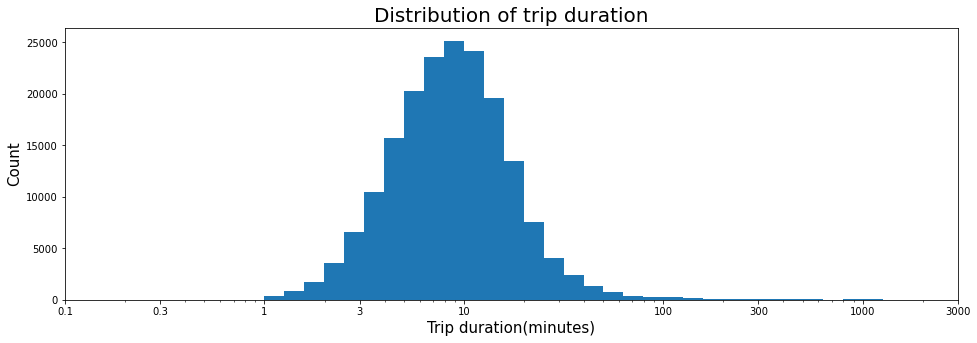

In [76]:
# plot trip duration distribution in log scale

log_bin = 0.1
bin_edges = 10**np.arange(0,3.15+log_bin, log_bin)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 100, 300, 1000, 3000]

# Convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(x) for x in ticks]

# plot histogram 
plt.figure(figsize=[16,5])
plt.hist(data=gobike, x='duration_min', bins=bin_edges);

# set the log scale 
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);
plot_element(xlabel='Trip duration(minutes)',ylabel='Count',title='Distribution of trip duration')

The distribution of trip duration looks roughly unimodal with one peak which indicates that most of the trips lasted for approximately 10 minutes. As the trip duration increases, the number of trips decline rapidly.

### What is the age of members' that took the most trips?

To achieve this plot, I will derive the members' ages from the `member_birth_years` column in the dataset. Since the the data was collected in 2019, all member_birth years will be subtracted from 2019 to get their respective age.

In [36]:
# create a column in the dataset for member age 
gobike['member_age'] = 2019-gobike['member_birth_year']

In [37]:
# Get statistical summary
gobike['member_age'].describe()

count    183215.000000
mean         34.154671
std           9.744544
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          99.000000
Name: member_age, dtype: float64

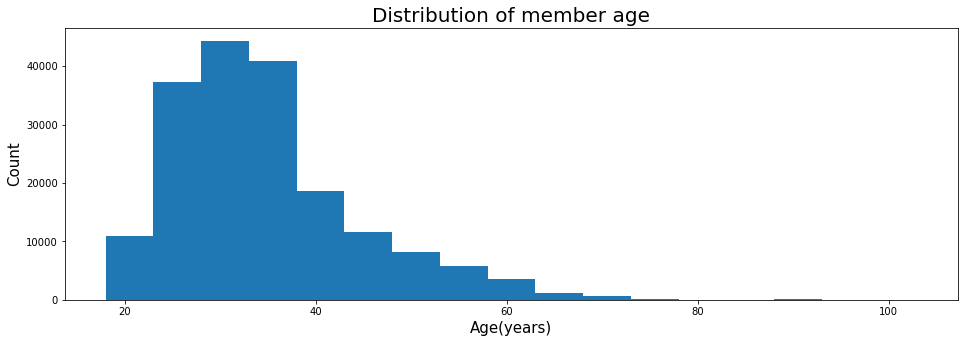

In [75]:
# Create bin for histogram
bin_size = 5
bin_edges = np.arange(18, gobike['member_age'].max()+bin_size, bin_size)

# Plot the distribution of member age
plt.figure(figsize=[16,5])
plt.hist(data=gobike, x='member_age', bins=bin_edges)
plot_element('Age(years)','Count','Distribution of member age')

Most of the members are under age of 40 years. The distribution is righ-skewed and roughly unimodal. Also, there are outlier ages.

### What is the length of most traveled distance?

In [39]:
# Get statiscal summary
gobike['trip_distance'].describe()

count    183215.000000
mean       1691.829969
std        1097.920735
min           0.000000
25%         911.212708
50%        1432.877263
75%        2226.756045
max       69488.867842
Name: trip_distance, dtype: float64

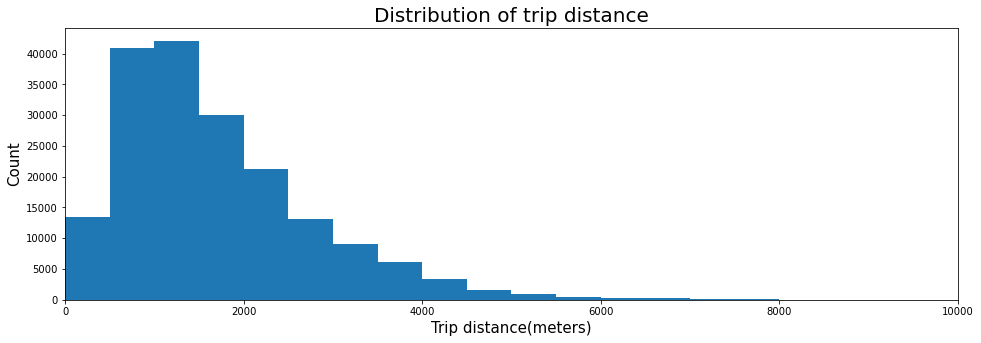

In [78]:
# Create bin for histogram
bin_width = 500
bin_edges = np.arange(0, gobike['trip_distance'].max()+500, 500)

# Plot the distribution of trip distance
plt.figure(figsize=[16,5])
plt.hist(data=gobike, x='trip_distance', bins=bin_edges);
plt.xlim([0, 10000])
plot_element('Trip distance(meters)','Count','Distribution of trip distance')

In an initial distribution plot of trip distance without any xlim, the distribution of trip distance was very right skewed with majority of it values pushed to the far left because of the presence of high outlier values of distance but after I included a limit of 10000 on the x-axis with a bin_width of 500, it can been seen that the distribution trip distance is roughly bimodal with peak number of trips covering between 500 - 1500 meters of distance.

Now I want to look at the distribution of the categorical variables n the dataset to understand how theay are disrtibuted. I'll start the user type variable which has two distinct categories; Subscriber and Customer. 

Considering that I will be ploting alot of categorical variables as bar charts, I will like to create a function that will handle the annotations

In [41]:
def annot_text(value_count, sum_of_count):
    '''
    Create annotation on bars in a plot
    
    Parameters:
    value_count: value counts of a variable
    sum_of_count: sum of the count of each value in a variable
    
    returns:
    annotation in percentage on each bar in a plot
    '''
    
    locs, labels = plt.xticks()
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        
        # Get the text property for the label to get the correct count
        count = value_count[label.get_text()]
        percentage_string = '{:0.1f}%'.format(100*count/sum_of_count)
        
        # print the annotation just below the top of the bar
        annotation = plt.text(loc, count+500, percentage_string, ha='center', color='black')
    
    return annotation    



### Which user type did the majority of trips?

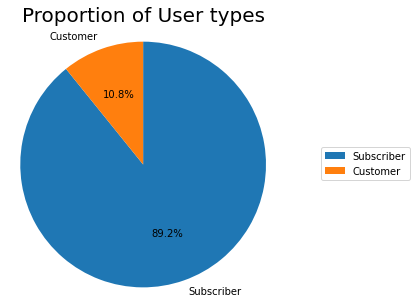

In [42]:
# create parameter for the pie chart plot
user_count = gobike['user_type'].value_counts()
order = user_count.index

# plot pie chart of the distribution
plt.figure(figsize=[16,5]) 
plt.pie(user_count, labels = order, startangle = 90, autopct="%0.1f%%", counterclock=False);
plt.axis('square');
plt.title("Proportion of User types", fontsize=20)
plt.legend(loc='center right', bbox_to_anchor=(1.5,0.5));

Of all the trips recorded, 89.2% were done by subscribers while 10.8% were done by generic customers. 

Next, I will like to know the proportion of trips that user completed entirely with using only bike share as there mode of transport.


### Do users use only bike share for their trip?

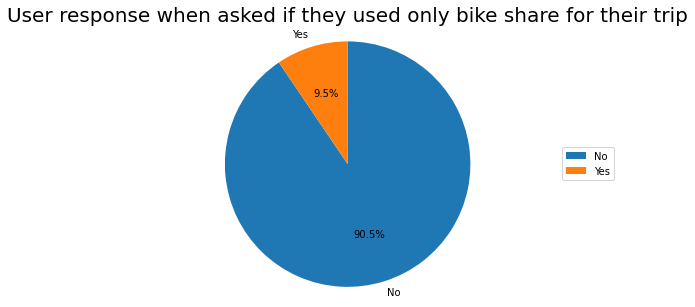

In [43]:
share_count = gobike['bike_share_for_all_trip'].value_counts()
share_order = share_count.index

# Plot pie chart of proportion 
plt.figure(figsize=[16,5])
plt.pie(share_count, labels=share_order, startangle=90, autopct="%0.1f%%", counterclock=False)
plt.axis("square")
plt.title("User response when asked if they used only bike share for their trip", fontsize=20)
plt.legend(loc='center right', bbox_to_anchor=(1.5,0.5));

Only 9.5% of all the trips recorded were done completely with the bike share service. This indicates that most of the users use other mode of transport as 90.5% of the trips were not completed using only bike share.

Next, I will like to know the proportion of trips by member gender.


### Which member gender did the majority of trips?

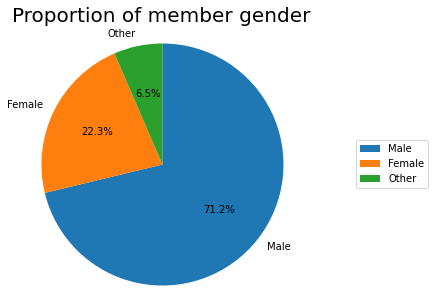

In [44]:
gender_count = gobike['member_gender'].value_counts()
gender_order = gender_count.index

# Plot pie chart of porportion
plt.figure(figsize=[16,5])
plt.pie(gender_count, labels = gender_order, startangle=90, autopct="%0.1f%%", counterclock=False)
plt.axis('square')
plt.title("Proportion of member gender", fontsize=20)
plt.legend(loc='center right', bbox_to_anchor=(1.5,0.5));

71.2% of all the trips recorded were done by males, 22.3% were done by females and 6.5% were done by people who indentify as other types of gender. It is a clear indication that most of the user of the service are males.


### How does the number of trips vary across the days of the week?

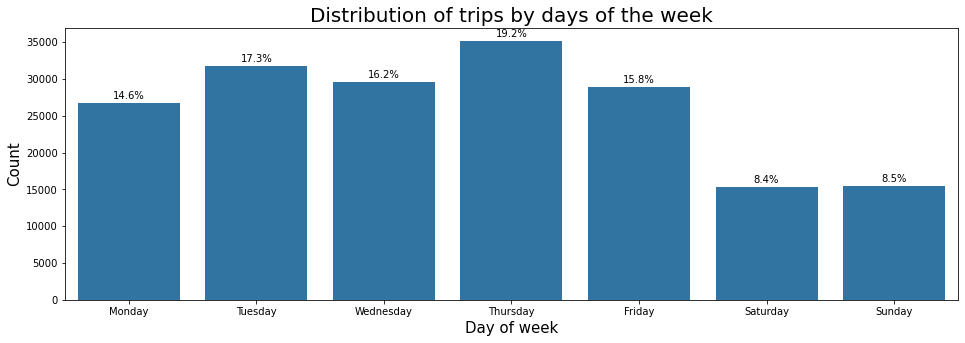

In [79]:
# create annotation parameters
trip_day_count = gobike['trip_start_day'].value_counts()
sum_of_count = trip_day_count.sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# plot bar chart to show the variation of trip number across months
plt.figure(figsize=[16,5])
base_color = sb.color_palette()[0]
sb.countplot(data=gobike, x='trip_start_day', color=base_color, order=days_order)
annot_text(trip_day_count, sum_of_count)
plot_element('Day of week','Count','Distribution of trips by days of the week')

Thursday has the highest counts of trips followed by Tuesday while Saturday and Sunday has the lowest amount of trips with roughly equal numbers of trips done on both days.

Lastly, I will like to look at how number of trips vary with respect to the time of day. 


### How does the number of trips vary across the period of day?

I expect that there will be lesser number of trips in the afternoon because of the relatively hotter weather compared to the morning and evening. 

To achieve this plot I will create function to feature the dataset by deriving the time of day column from the `trip_start_clock_time` column

In [46]:
# get the hour before the colon and minutes from the values in trip_start_clock_time colum
gobike['start_hour'] = gobike['trip_start_clock_time'].str.split(':').str[0]
# convert the extract hour object to integer
gobike['start_hour'] = gobike['start_hour'].astype('int')

In [47]:
# Function to map time of day to hour integers
def time_of_day(frame_row):
    '''
    Maps hourly figures in a dataframe column to the time of day.
    (Monring, Afternoon, Evening, Night)
    
    Parameters:
    frame_col: a Pandas Series or DataFrame column 
    
    returns: scalar values mapped to the values in the Series, DataFrame column
    '''
    # Morning if trip hour is between 5am and 11am 
    if frame_row >=5 and frame_row <=11:
        return 'Morning'
    # Afternoon if trip hour is between 12pm and 4pm  
    if frame_row >=12 and frame_row <=16:
        return 'Afternoon'
    # Evening if trip hour is between 5pm and 8pm  
    if frame_row >=17 and frame_row <=20:
        return 'Evening'
    # Night if trip hour is after 9pm  
    else:
        return 'Night' 
    
# map the function to the dataset and create and new column
gobike['time_of_day'] = gobike['start_hour'].map(time_of_day)
gobike.sample(4)

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_gender,bike_share_for_all_trip,trip_start_month,trip_start_day,trip_start_clock_time,trip_distance,duration_min,member_age,start_hour,time_of_day
76511,76617,930,2019-02-19 08:04:29.949,2019-02-19 08:20:00.319,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,20.0,Mechanics Monument Plaza (Market St at Bush St),...,Male,No,February,Tuesday,08:04,4885.022369,15.500000,31,8,Morning
86873,87002,710,2019-02-17 11:03:54.112,2019-02-17 11:15:44.788,195.0,Bay Pl at Vernon St,37.812314,-122.260779,175.0,49th St at Telegraph Ave,...,Male,No,February,Sunday,11:03,2632.134198,11.833333,51,11,Morning
165564,165754,508,2019-02-04 22:50:20.647,2019-02-04 22:58:49.095,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,269.0,Telegraph Ave at Carleton St,...,Female,No,February,Monday,22:50,854.247564,8.466667,23,22,Night
115484,115622,178,2019-02-12 08:38:20.791,2019-02-12 08:41:19.437,116.0,Mississippi St at 17th St,37.764802,-122.394771,104.0,4th St at 16th St,...,Female,No,February,Tuesday,08:38,426.716105,2.966667,31,8,Morning


In [48]:
# Create order of time of day categories
period_order = ['Morning', 'Afternoon','Evening', 'Night']

# Return the type for time of day with categories and orderedness
timeofdays = pd.api.types.CategoricalDtype(ordered=True, categories=period_order)

# Use pandas.astype() to convert the 'time_of_day' column from plain object type into ordered categorical type
gobike['time_of_day'] = gobike['time_of_day'].astype(timeofdays)

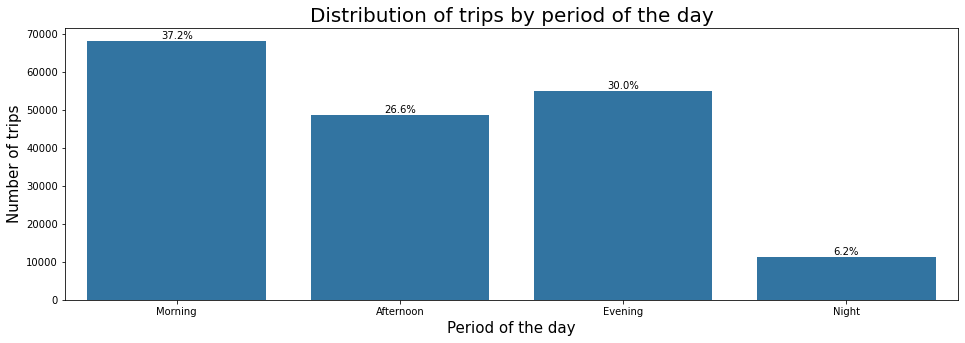

In [49]:
timeofdaycount= gobike['time_of_day'].value_counts()
sumoftdaycount = timeofdaycount.sum()
# plot bar chart
plt.figure(figsize=[16,5])
sb.countplot(data=gobike, x='time_of_day', color=base_color);
annot_text(timeofdaycount, sumoftdaycount)
plot_element('Period of the day','Number of trips','Distribution of trips by period of the day')

Just like I expected, 37.2% of all the trips were done in the morning period which is between the hours of 5AM - 11AM  thereby making it the period with the highest amount of trips followed by the Evening period which is between the hours of 4PM - 9PM and has 30% of all the trips. The Afternoon and night period have the lowest amount of trips with 26.6% and 6.2% respectively.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> On a log scale, the distribution of trip duration looks roughly unimodal with one peak which indicates that most of the trips lasted for approximately 10 minutes. Also I observed that as the trip duration increased, the number of trips decline rapidly.
> most trips were initiated by members' aged 28 - 33 years old and the most common trip distance is between 500 - 1500 meters.  89.2% of all the trips recorded, were done by subscribers while 10.8% were done by generic customers. 71.2% of all the trips recorded were done by males, 22.3% were done by females and 6.5% were done by people who indentify as other types of gender.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Thursday had the highest number of trips in all the days of the week with 19.2% of all the trips occuring on Thursday. Only 9.5% of all the trips recorded were reported to have been done completely with the bike share service.

> Initially it was difficult to understand the nature of the distribution of duration because its max value is 85444 and this made the point for the other values to be pushed to the far left of the x-axis. So I used a bin width of 200 and put a limit of 6000 on the x-axis to get a more readable plot that showed the distribution is right skewed. 
I feature engineered the dataset to add column for, duration converted to minute inorder to reduce the range of values, to derive member ages because only the members' birth years were captured in the data, trip distance because only start and end station coordinates were captured in the data, trip start day and trip start clock because only datetime was captured in the data.  I did this because I wanted to understand the distribution of the ages of members, trip distance, trip start clock time as I expect these additional features will have effect on predicting trip duration. I also further featured engineered the dataset to add a period_of_day column inorder to aid my analysis to see how trip varied with respect to the period of the day(morning, afternoon, evening, night)

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [50]:
# Get conscise summary of dataset
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 25 columns):
index                      183215 non-null int64
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null object
user_type                  183215 non-null object
member_birth_year          183215 non-null int64
member_gender              183215 non-null object
bike_share_for_all_trip    183215 non-null object
trip_start_month      

In [54]:
# create list of dataset variables
numeric_vars = ['duration_min', 'member_age','trip_distance']
categoric_vars = ['user_type','trip_start_day', 'time_of_day', 'member_gender']

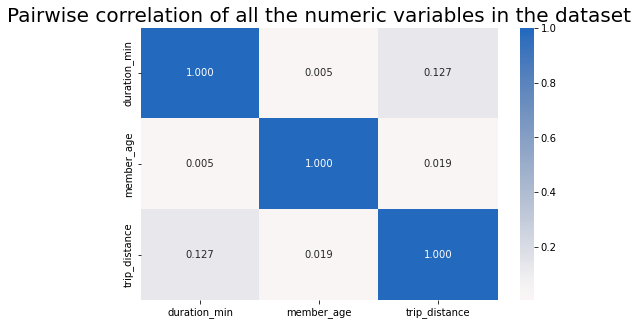

In [130]:
# correlation plot
plt.figure(figsize = [8,5])

# Plot seaborn heatmap 
sb.heatmap(gobike[numeric_vars].corr(), annot=True, fmt= '.3f', cmap='vlag_r', center=0)

# set plot title 
plt.title('Pairwise correlation of all the numeric variables in the dataset', fontsize=20)
plt.show()

Surprisingly, the correlation coefficient between trip distance and duration is the highest while the second highest correlation coefficient is between member age and trip distance.

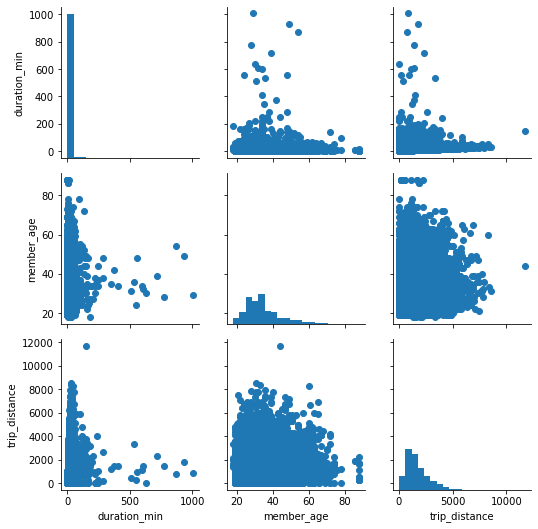

In [438]:
# Plot PairGrid of numeric variables in the table 
gobike_samp = gobike.sample(n=18000, replace=False)

# plot seaborn FacetGrid for numerical variable levels 
g = sb.PairGrid(data= gobike_samp, vars=numeric_vars)
g = g.map_diag(plt.hist, bins=20) # Map histograms on PairGrid diagonal plots
g.map_offdiag(plt.scatter); # Map scatterplots on PairGrid off diagonal plots

As expected, the member age and trip distance are highly correlated with one another, and both of them are correlated with trip duration.


### How does member age effect trip distance?

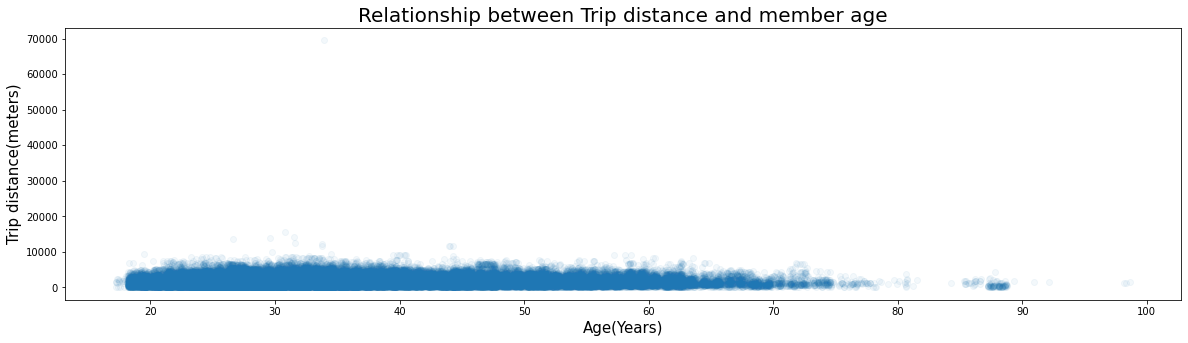

In [67]:
# set plot figure width and height
plt.figure(figsize=[20,5])

# plot seaborn scatter plot 
sb.regplot(data=gobike, x='member_age', y='trip_distance', truncate=False,x_jitter=0.8, fit_reg=False, scatter_kws={'alpha':1/20});

# my customer helper function to write plot labels
plot_element(xlabel='Age(Years)', ylabel='Trip distance(meters)', title='Relationship between Trip distance and member age');

Most of the trips are below 1000 meters with outliers at almost 70000 meters. I'm going to put a limit of the y-axis to expand the portion with plot density

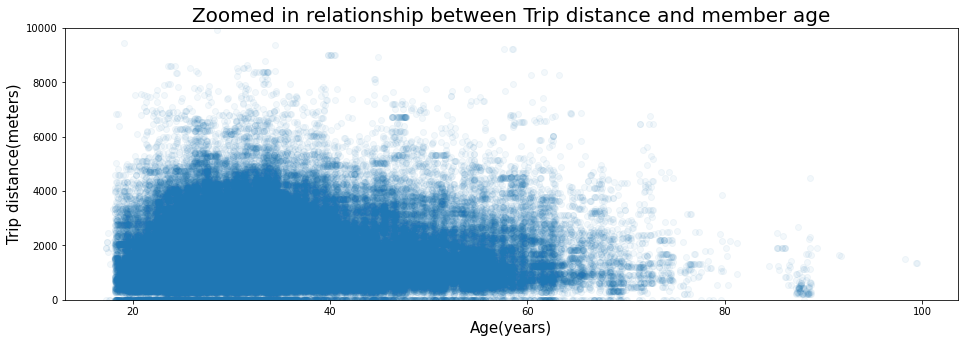

In [70]:
# set plot figure width and height
plt.figure(figsize=[16,5])

# plot seaborn scatter plot 
sb.regplot(data=gobike, x='member_age', y='trip_distance', truncate=False,x_jitter=0.8, fit_reg=False, scatter_kws={'alpha':1/20});
plt.ylim([0,10000]); # set y axis values limit

# my customer helper function to write plot labels
plot_element(xlabel='Age(years)', ylabel='Trip distance(meters)', title='Zoomed in relationship between Trip distance and member age')

The trip distance and member age have a linear correlation for distances under 10000 meters. As expected the older the members the lesser the distance they can cover and it is evident in the scatter plot as members aged 18 - 60 years old convered more distance than members aged above 60 years old.

### How does member age effect trip duration?

In [87]:
# Generate statiscal description
gobike[['member_age', 'duration_min']].describe()

,member_age,duration_min
count,183215.000000,183215.000000
mean,34.154671,12.098367
std,9.744544,29.917978
min,18.000000,1.016667
25%,27.000000,5.416667
50%,32.000000,8.566667
75%,38.000000,13.266667
max,99.000000,1424.066667


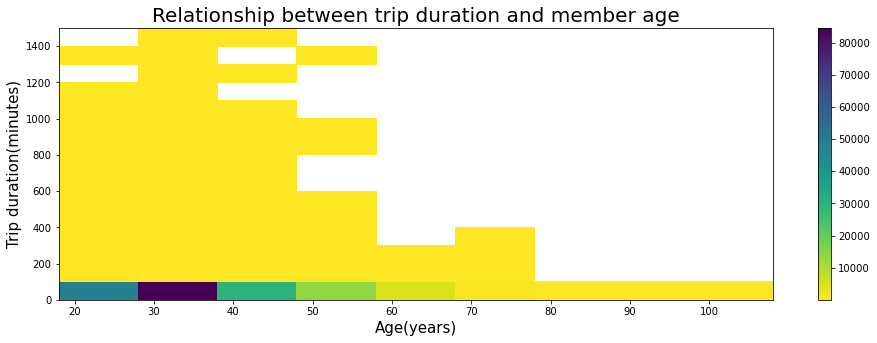

In [73]:
# set plot figure width and height
plt.figure(figsize=[16,5])

# Create bins for plot axis 
bins_x=np.arange(18,99+10,10)
bins_y=np.arange(0,1424+100,100)

# Plot matplotlib heatmap 
h2d = plt.hist2d(data=gobike, x='member_age', y='duration_min', cmin=0.5, cmap='viridis_r', bins=[bins_x,bins_y])
# add color bar 
plt.colorbar();

# my custom function to wirte plot labels 
plot_element('Age(years)','Trip duration(minutes)','Relationship between trip duration and member age')

Members aged 18 - 48 years did the majority of all the trips that lasted for a duration of 200 minutes and above.

Next I will like to look at the effect of trip distance on duration

### How does trip distance effect trip duration?

In [147]:
# Generate statiscal description
gobike[['trip_distance', 'duration_min']].describe()

,trip_distance,duration_min
count,183215.000000,183215.000000
mean,1691.829969,12.098367
std,1097.920735,29.917978
min,0.000000,1.016667
25%,911.212708,5.416667
50%,1432.877263,8.566667
75%,2226.756045,13.266667
max,69488.867842,1424.066667


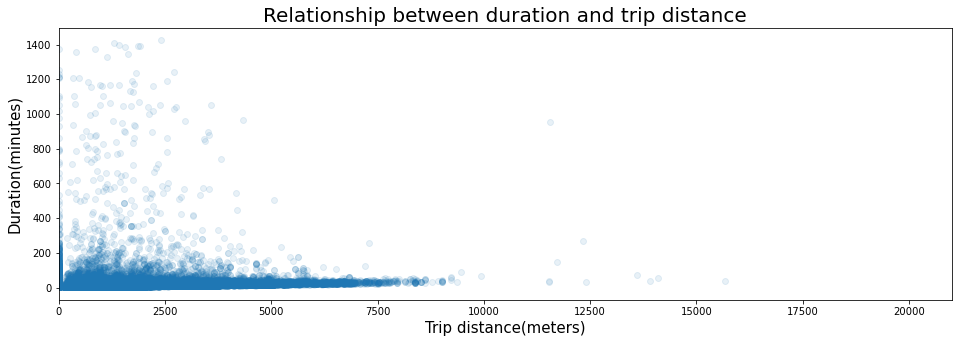

In [373]:
# set plot figure width and height
plt.figure(figsize=[16,5])

# Plot seaborn scatter plot
sb.regplot(data=gobike, x='trip_distance', y='duration_min', x_jitter=0.3, scatter_kws={'alpha':1/10},fit_reg=False);

# x-axis limt 
plt.xlim([0,21000]);


# my custom function to wirte plot labels
plot_element('Trip distance(meters)','Duration(minutes)', 'Relationship between duration and trip distance')

Quite unexpected but most of the long duration trips were for distances on the lower end of the total distance spectrum. This could be an indication of high traffic congestion on routes with shorter distance or some other reasons.

Lets put an x-axis limit of 4000 to zoom in on the distribution

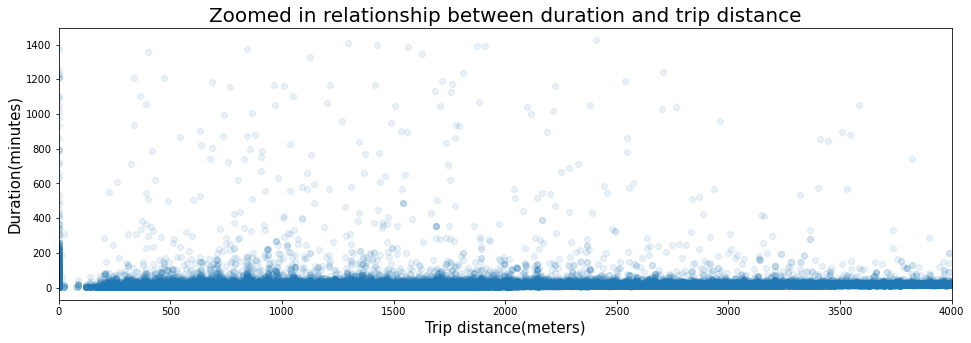

In [374]:
# set plot figure width and height
plt.figure(figsize=[16,5])

# plot seaborn scatterplot of duration vs trip distance with limit on x-axis = 4000 
sb.regplot(data=gobike, x='trip_distance', y='duration_min', x_jitter=0.3, scatter_kws={'alpha':1/10},fit_reg=False);

# x-axis limt 
plt.xlim([0,4000]);

# my custom function to wirte plot labels
plot_element('Trip distance(meters)','Duration(minutes)', 'Zoomed in relationship between duration and trip distance')

it can be observed in the distribution plot that a reasonable number of trips lasted above 100 minutes 

Lets look at the combination of start and end stations for trips with distance below 4000 meters that lasted above 100 minutes.

In [314]:
# select trip distance, using criteria eyeballed from the plots 
gobike_100minsplus = gobike.query('trip_distance < 4000 & duration_min > 100')

In [315]:
# Get the first 50 trips the query dataframe
gobike_100minsplus.groupby(['start_station_name', 'end_station_name','trip_distance'])['duration_min'].sum().reset_index().sort_values('trip_distance').head(50)

,start_station_name,end_station_name,trip_distance,duration_min
0,10th St at Fallon St,10th St at Fallon St,0.0,900.433333
370,Ninth St at Heinz Ave,Ninth St at Heinz Ave,0.0,1232.166667
371,North Berkeley BART Station,North Berkeley BART Station,0.0,1049.050000
376,O'Farrell St at Divisadero St,O'Farrell St at Divisadero St,0.0,1211.600000
101,Berry St at 4th St,Berry St at 4th St,0.0,581.216667
382,Page St at Scott St,Page St at Scott St,0.0,2749.383333
98,Berkeley Civic Center,Berkeley Civic Center,0.0,101.933333
384,Parker St at Fulton St,Parker St at Fulton St,0.0,657.966667
389,Pierce St at Haight St,Pierce St at Haight St,0.0,187.916667
91,Bancroft Way at Telegraph Ave,Bancroft Way at Telegraph Ave,0.0,586.116667


In [322]:
print("A total of {} trips had a trip duration of more than 100 minutes and {} of those trips had their trip distance captured as zero.".format(gobike_100minsplus['trip_distance'].value_counts().sum(), gobike_100minsplus['trip_distance'].value_counts()[0]))

A total of 852 trips had a trip duration of more than 100 minutes and 192 of those trips had their trip distance captured as zero.


192 trips that lasted for more than 100 minutes were captured as zero distance. This is not a quality issue because the distance were calculated from recorded gps coordinates so it is most likely that the respective users who did the trips used the bike share service to run errands within their locality and then rode back to the respective start stations to drop the bike and end their trip. This clarifies why distances on the lower end of the total distance spectrum have the most numbers of trips with long durations.


### What is the average trip duration of each day of the week?

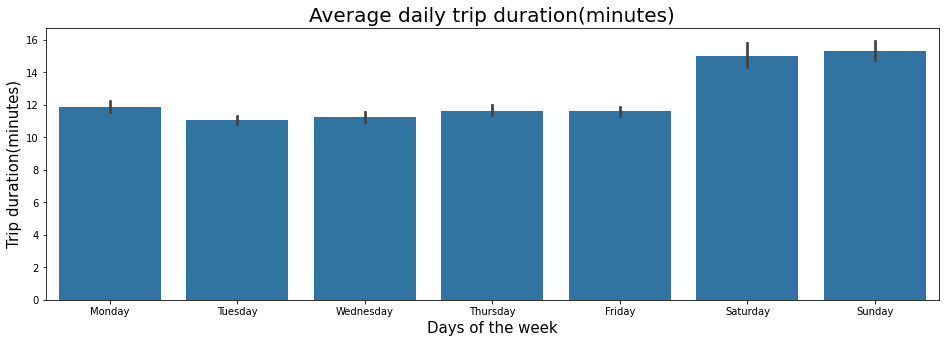

In [425]:
# set plot figure width and height
plt.figure(figsize=(16,5))

# plot seaborn barplot
sb.barplot(data=gobike, x='trip_start_day', y='duration_min', color=base_color, order=days_order);

# my custom function to wirte plot labels
plot_element('Days of the week','Trip duration(minutes)','Average daily trip duration(minutes)')

Despite Saturday and Sunday been the days of the week with the lowest number of trips, they both have a significantly higher average trip duration when compared to the other days. 

Since the members age has a strong effect on trip duration, I will like to see the distribution of  riders age on each day. 

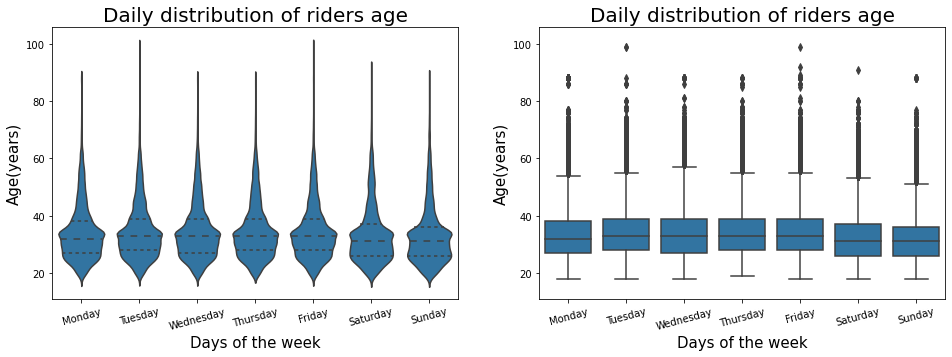

In [376]:
# set plot figure width and height
plt.figure(figsize=[16,5])
# left plot: violin plot
plt.subplot(1,2,1)
# lets return the axes object
ax1= sb.violinplot(data=gobike, x='trip_start_day', y='member_age', color=base_color, inner='quartile', order=days_order);
plt.xticks(rotation=15)
# my custom function to wirte plot labels
plot_element('Days of the week', 'Age(years)', 'Daily distribution of riders age')


# Right plot: box plot
plt.subplot(1,2,2)
sb.boxplot(data=gobike, x='trip_start_day', y='member_age', color=base_color, order=days_order)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.xticks(rotation=15)
# my custom function to wirte plot labels
plot_element('Days of the week','Age(years)','Daily distribution of riders age')

The age distribution of Saturday and Sunday riders are similar and younger with a lower median age compared to the other days. This agrees with my earlier observation that riders aged 18 - 48 years old did the most numbers of long duration trips but still doesn't give clarity for why Saturday and Sunday has a higher average trip duration. 

Recall that 852 trips with a duration of over 100 minutes were recorded. I will like to see the daily distribution of these trips that lasted over 100 minutes.

To achieve the plot I will the subset dataframe `gobike_100minsplus` that was created above.

In [323]:
# Get statiscal description of dataframe's duration_min column.
gobike_100minsplus['duration_min'].describe()

count     852.000000
mean      303.878541
std       294.524277
min       100.166667
25%       125.666667
50%       172.983333
75%       330.487500
max      1424.066667
Name: duration_min, dtype: float64

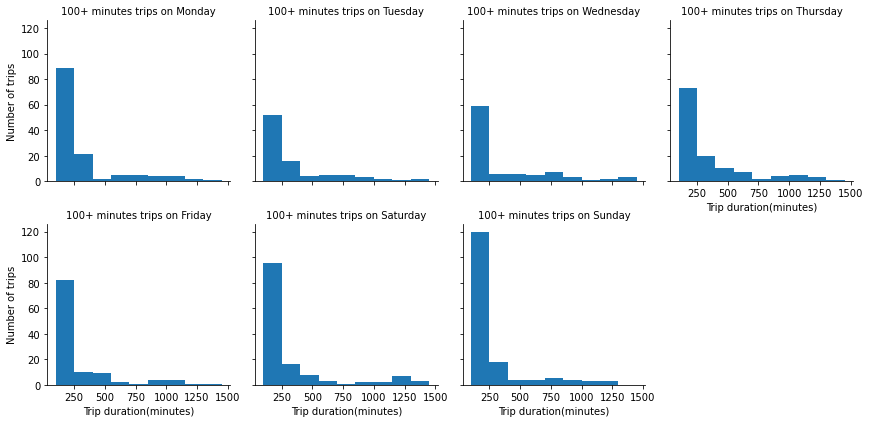

In [345]:
bin_width = np.arange(100,1424+150, 150)

# plot seaborn FacetGrid on categorical level of trip_start_day
g= sb.FacetGrid(data=gobike_10minsplus, col='trip_start_day', col_order=days_order, sharey=True, col_wrap=4)

# map histogram plots of duration_min for each FacetGrid categorical level
g.map(plt.hist, "duration_min", bins=bin_width);

g.set_axis_labels(' ', 'Number of trips'); # set FacetGrid y-axis labels  
g.set_xlabels('Trip duration(minutes)'); # set FacetGrid  x-axis labels 
g.set_titles(col_template="100+ minutes trips on {col_name}"); # Set FacetGrid categorical level titles

Most of the trips that lasted over 100 minutes happend on Sunday and Saturday.

Lastly for this section, I will like to look at the average trip duration of each user type.

### What is the average trip duration of each user type?

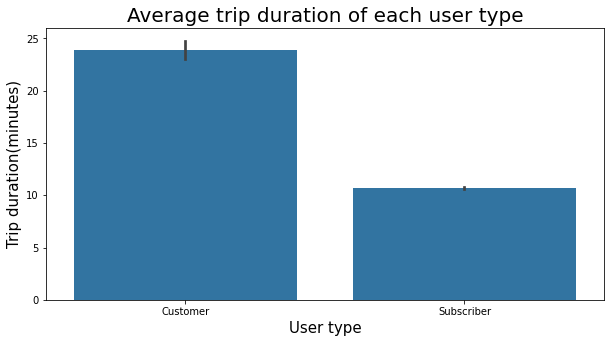

In [424]:
plt.figure(figsize=[10,5])
sb.barplot(data=gobike, x='user_type', y='duration_min', color=base_color);

# my custom function to wirte plot labels
plot_element('User type','Trip duration(minutes)','Average trip duration of each user type')

The average trip duration of Customer users is more than twice the average trip duration of the subscriber users.

###  What is the average trip duration of each time of day?

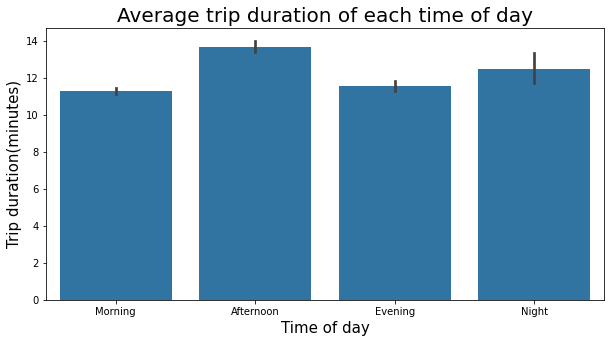

In [423]:
# Set plot figure width and height 
plt.figure(figsize=[10,5])

# plot seaborn bar plot 
sb.barplot(data=gobike, x='time_of_day', y='duration_min', color=base_color);

# my custom function to wirte plot labels
plot_element(xlabel='Time of day', ylabel='Trip duration(minutes)', title='Average trip duration of each time of day')

Afternoon and night time of day both have a higher average trip duration compared to the others even though both periods were observed by the earlier univariate exploration as the periods with the lowest number of trips.

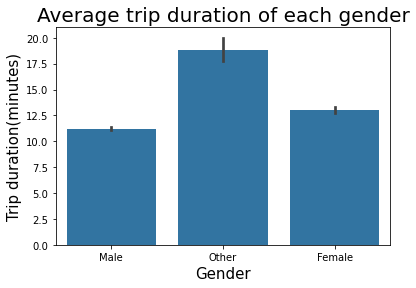

In [74]:
# Set plot figure width and height 
plt.figure(figsize=[10,5])

# plot seaborn barplot 
sb.barplot(data=gobike, x='member_gender', y='duration_min', color=base_color);

# my custom function to wirte plot labels
plot_element(xlabel='Gender', ylabel='Trip duration(minutes)', title='Average trip duration of each gender')

User who identified as Other gender have the highest average trip duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the exploration, I found that the majority of trips with duration of above 200 minutes were done by members aged 18 - 48 years old. Customers have twice the average trip duration of subscribers and users who identified as Other gender have the highest average trip duration while Male gender have the least average trip duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Surprisingly, most of the long duration trips were for distances on the lower end of the total distance spectrum. I later found out that 192 trips that lasted for more than 100 minutes were captured as zero distance. This particular long duration trips were rounds trips in the same locality because the trips ended at same stations where they had started and since trip distance was calulated as the difference between the corodinates of the trip start and end station this made the trip distance of this particular trips to captured as zero distance.

## Multivariate Exploration

> In this section, I'll investigate relationship between pairs of variables in the dataset.

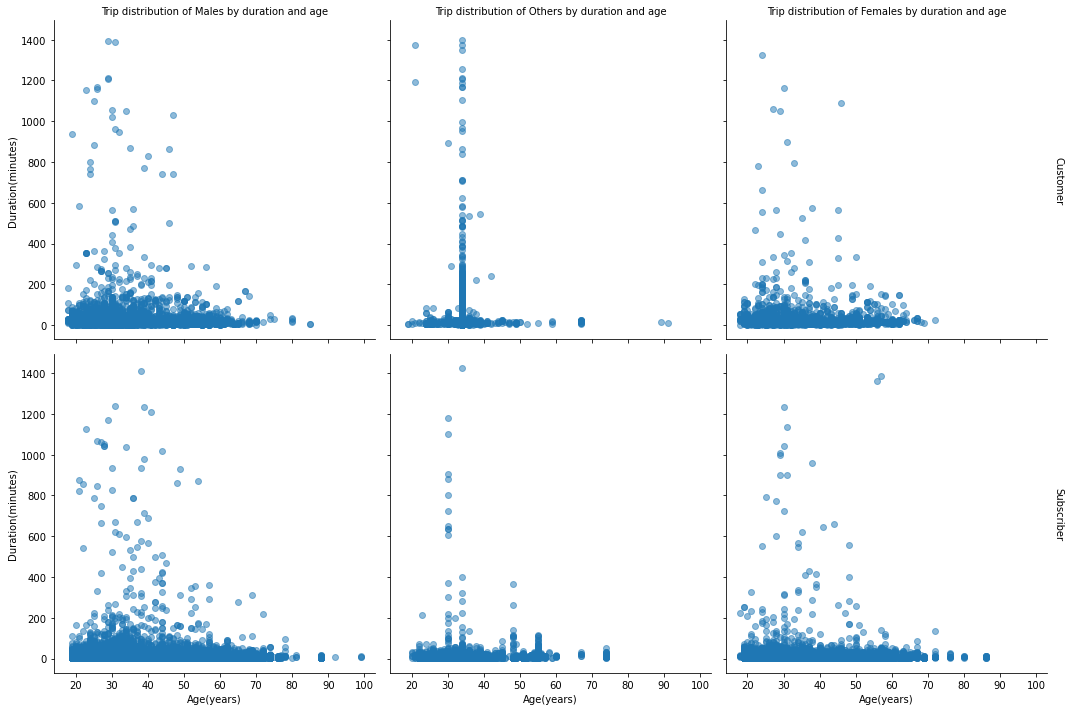

In [108]:
# plot FacetGrid of two category variables and two numeric variables
g= sb.FacetGrid(data= gobike, col='member_gender',row='user_type',height = 5 , margin_titles = True)
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.5)
g.set_axis_labels('Age(years)', 'Duration(minutes)');
g.set_titles(row_template='{row_name}', col_template="Trip distribution of {col_name}s by duration and age"); # Set each column name

The distribution across all gender and user type shows that members aged 18 - 48 years old spend the most time when using the bikes as they did most of the long duration trips.

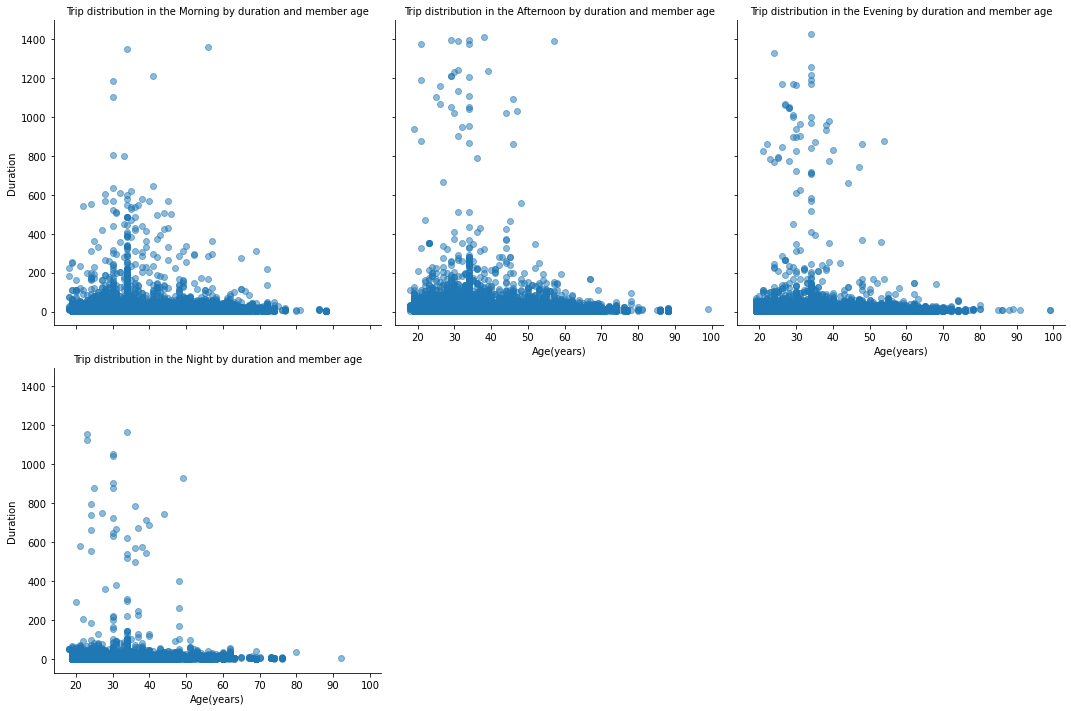

In [109]:
# plot FacetGrid of one category variable and two numeric variables
g= sb.FacetGrid(data= gobike, col='time_of_day', col_wrap= 3,height = 5 )
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.5)
g.set_axis_labels('Age(years)', 'Duration');
g.set_titles(col_template="Trip distribution in the {col_name} by duration and member age");

The distribution of trip duration across the time of day shows that members aged 18 - 48 years old spend the most time when using the bikes as they did most of the long duration trips.

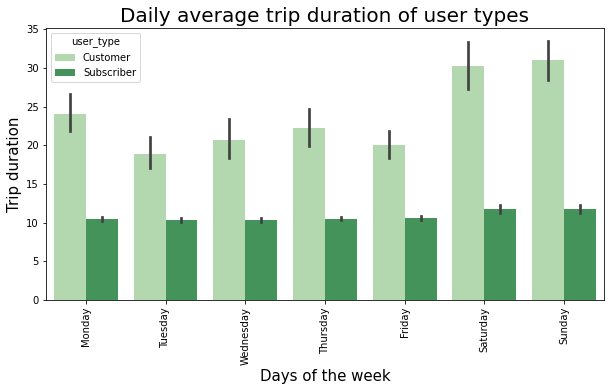

In [104]:
plt.figure(figsize=[10,5])
sb.barplot(data=gobike, x='trip_start_day', y='duration_min', order=days_order, hue='user_type', palette ='Greens');
plt.xticks(rotation=90);
# my custom function to wirte plot labels
plot_element(xlabel='Days of the week', ylabel='Trip duration', title='Daily average trip duration of user types')

On Every day of the week the customers tend to use more time than the subscribers on the bikes. 

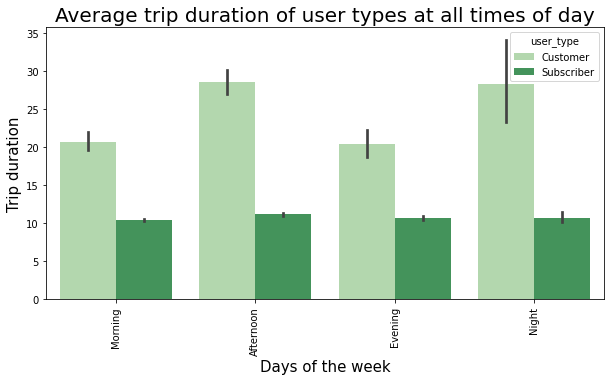

In [102]:
plt.figure(figsize=[10,5])
sb.barplot(data=gobike, x='time_of_day', y='duration_min', hue='user_type', palette ='Greens');
plt.xticks(rotation=90);
# my custom function to wirte plot labels
plot_element(xlabel='Days of the week', ylabel='Trip duration', title='Average trip duration of user types at all times of day')

At all times of the day the customers tend to use more time than the subscribers on the bikes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  I observed that Across all the genders, members aged 18 - 48 years old spend the most time when using the bikes as they did most of the long duration trips. The customer user even though they are a small percentage, have the most trips with consistent daily average trip duration higher than the subscriber users.

### Were there any interesting or surprising interactions between features?

> No suprises, everything was as is expected.

## Conclusions

> In conclusion, I will say most users are males and they tend to ride for short durations because the most trips tend to last for approximately 10 minutes. Also of the two user types, subscribers did the most trips but on a daily basis customers tend to have a higher average trip duration. The majority of users are under the age of 40 years and they use the service in addition with other modes of transport to complete their trips. Although Saturday and Sunday have the least of amounts of trips, most of the long duration trips happened on these same days. Thursday has the highest amount of trips. Based on the period of the day, trips tend to be lesser in the Afternoon and Night time but the average trip duration tend to be higher during these same periods.


> Outside of the main variable of interest, I observed the relationship between member age, trip distance and day of the week. As I expected, the older the member the lesser the distance they covered and, it this was evident in the exploration as I found that members aged 18 - 50 years old convered more distance than members aged above 50 years old. I also found that the age distribution of members who booked trips on Saturday and Sunday are similar and younger compared to other days.

In [111]:
gobike.to_csv('gobike.csv', index=False)